In [8]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image
import urllib.request

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cols = [
    "team",
    "points",
    "group",
    "spi",
    "global_o",
    "global_d",
    "group_1",
    "group_2",
    "group_3",
    "make_round_of_16",
    "make_quarters",
    "make_semis",
    "make_final",
    "win_league",
]

df = pd.read_csv(
    "wwc_forecasts.csv",
    usecols=cols,
)

In [5]:
colnames = [
    "Team",
    "Points",
    "Group",
    "SPI",
    "OFF",
    "DEF",
    "1st Place",
    "2nd Place",
    "3rd Place",
    "Make Rd Of 16",
    "Make Quarters",
    "Make Semis",
    "Make Finals",
    "Win World Cup",
]

col_to_name = dict(zip(cols, colnames))


In [25]:
Codes = {
        'Qatar':5902,
        'Brazil':8256,
        'Uruguay':5796,
        'Argentina':6706,
        'South Korea':7804,
        'Iran':6711,
        'Japan':6715,
        'Saudi Arabia':7795,
        'Ecuador':6707,
        'Tunisia':6719,
        'Ghana':6714,
        'Senegal':6395,
        'Cameroon':6629,
        'Switzerland':6717,
        'Serbia':8205,
        'Portugal':8361,
        'Spain':6720,
        'Croatia':10155,
        'Canada':5810,
        'Australia':6716,
        'Morocco':6262,
        'Denmark':8238,
        'France':6723,
        'Belgium':8263,
        'Wales':394253,
        'United States':6713,
        'USA':6713,
        'Poland':8568,
        'Netherlands':6708,
        'England':8491,
        'Germany':8570,
        'Costa Rica':6705,
        'Mexico':6710,
        'Sweden':8520,
        'China':5822,
        'Nigeria':6346,
        'Scotland':8498,
        'South Africa':6316,
        'Thailand':5788,
        'Jamaica':5806,
        'Chile':9762,
        'Italy':8204,
        'New Zealand':5820,
        'Norway':8492,
        'Colombia':8258
    }
def team_url(team_id):
    url = f"https://images.fotmob.com/image_resources/logo/teamlogo/{team_id:.0f}.png"
    return(url)



In [26]:
country_to_flagpath = {x: team_url(Codes[x]) for x in set(df["team"])}
df.insert(0, "Flag", df["Team"].apply(lambda x: country_to_flagpath.get(x)))

In [28]:
df[["spi", "global_o", "global_d"]] = df[["spi", "global_o", "global_d"]].round(1)

df = df.rename(col_to_name, axis=1)
df = df.drop("Points", axis=1)
df.insert(0, "Flag", df["Team"].apply(lambda x: country_to_flagpath.get(x)))

df = df.set_index("Team")

In [29]:
df

,Flag,Group,SPI,OFF,DEF,1st Place,2nd Place,3rd Place,Make Rd Of 16,Make Quarters,Make Semis,Make Finals,Win World Cup
Team,,,,,,,,,,,,,
USA,https://images.fotmob.com/image_resources/logo...,F,98.3,5.5,0.6,0.82956,0.17044,0.00000,1.00000,0.78079,0.47307,0.35076,0.23618
France,https://images.fotmob.com/image_resources/logo...,A,96.3,4.3,0.5,0.99483,0.00515,0.00002,1.00000,0.78367,0.42052,0.30038,0.19428
Germany,https://images.fotmob.com/image_resources/logo...,B,93.8,4.0,0.7,0.98483,0.01517,0.00000,1.00000,0.89280,0.48039,0.27710,0.12256
Canada,https://images.fotmob.com/image_resources/logo...,E,93.5,3.7,0.6,0.38830,0.61170,0.00000,1.00000,0.59192,0.36140,0.20157,0.09031
England,https://images.fotmob.com/image_resources/logo...,D,91.9,3.5,0.6,0.70570,0.29430,0.00000,1.00000,0.68510,0.43053,0.16465,0.08003
Netherlands,https://images.fotmob.com/image_resources/logo...,E,92.7,3.9,0.7,0.61170,0.38830,0.00000,1.00000,0.59166,0.36983,0.18514,0.07576
Australia,https://images.fotmob.com/image_resources/logo...,C,92.8,4.2,0.9,0.12812,0.53618,0.33529,0.99862,0.53811,0.26179,0.10214,0.04791
Sweden,https://images.fotmob.com/image_resources/logo...,F,88.4,3.0,0.6,0.17044,0.82956,0.00000,1.00000,0.46690,0.20267,0.10316,0.04006
Japan,https://images.fotmob.com/image_resources/logo...,D,90.3,3.8,0.9,0.29430,0.62818,0.07752,1.00000,0.46314,0.26616,0.09314,0.03515


In [30]:
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

In [47]:
df.head()

,Flag,Group,SPI,OFF,DEF,1st Place,2nd Place,3rd Place,Make Rd Of 16,Make Quarters,Make Semis,Make Finals,Win World Cup
Team,,,,,,,,,,,,,
USA,https://images.fotmob.com/image_resources/logo...,F,98.3,5.5,0.6,0.82956,0.17044,0.00000,1.0,0.78079,0.47307,0.35076,0.23618
France,https://images.fotmob.com/image_resources/logo...,A,96.3,4.3,0.5,0.99483,0.00515,0.00002,1.0,0.78367,0.42052,0.30038,0.19428
Germany,https://images.fotmob.com/image_resources/logo...,B,93.8,4.0,0.7,0.98483,0.01517,0.00000,1.0,0.89280,0.48039,0.27710,0.12256
Canada,https://images.fotmob.com/image_resources/logo...,E,93.5,3.7,0.6,0.38830,0.61170,0.00000,1.0,0.59192,0.36140,0.20157,0.09031
England,https://images.fotmob.com/image_resources/logo...,D,91.9,3.5,0.6,0.70570,0.29430,0.00000,1.0,0.68510,0.43053,0.16465,0.08003


In [31]:
team_rating_cols = ["SPI", "OFF", "DEF"]
group_stage_cols = ["1st Place", "2nd Place", "3rd Place"]
knockout_stage_cols = list(df.columns[-5:])


col_defs = (
    [
        ColumnDefinition(
            name="Flag",
            title="",
            textprops={"ha": "center"},
            width=0.5,
            plot_fn=circled_image,
        ),
        ColumnDefinition(
            name="Team",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
        ColumnDefinition(
            name="Group",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="SPI",
            group="Team Rating",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="OFF",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["OFF"], cmap=matplotlib.cm.PiYG, num_stds=2.5),
            group="Team Rating",
        ),
        ColumnDefinition(
            name="DEF",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["DEF"], cmap=matplotlib.cm.PiYG_r, num_stds=2.5),
            group="Team Rating",
        ),
    ]
    + [
        ColumnDefinition(
            name=group_stage_cols[0],
            title=group_stage_cols[0].replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            group="Group Stage Chances",
            border="left",
        )
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col.replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            group="Group Stage Chances",
        )
        for col in group_stage_cols[1:]
    ]
    + [
        ColumnDefinition(
            name=knockout_stage_cols[0],
            title=knockout_stage_cols[0].replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            cmap=cmap,
            group="Knockout Stage Chances",
            border="left",
        )
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col.replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            cmap=cmap,
            group="Knockout Stage Chances",
        )
        for col in knockout_stage_cols[1:]
    ]
)

In [42]:
df.head()

,Flag,Group,SPI,OFF,DEF,1st Place,2nd Place,3rd Place,Make Rd Of 16,Make Quarters,Make Semis,Make Finals,Win World Cup
Team,,,,,,,,,,,,,
USA,https://images.fotmob.com/image_resources/logo...,F,98.3,5.5,0.6,0.82956,0.17044,0.00000,1.0,0.78079,0.47307,0.35076,0.23618
France,https://images.fotmob.com/image_resources/logo...,A,96.3,4.3,0.5,0.99483,0.00515,0.00002,1.0,0.78367,0.42052,0.30038,0.19428
Germany,https://images.fotmob.com/image_resources/logo...,B,93.8,4.0,0.7,0.98483,0.01517,0.00000,1.0,0.89280,0.48039,0.27710,0.12256
Canada,https://images.fotmob.com/image_resources/logo...,E,93.5,3.7,0.6,0.38830,0.61170,0.00000,1.0,0.59192,0.36140,0.20157,0.09031
England,https://images.fotmob.com/image_resources/logo...,D,91.9,3.5,0.6,0.70570,0.29430,0.00000,1.0,0.68510,0.43053,0.16465,0.08003


In [32]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [48]:
df

,Flag,Group,SPI,OFF,DEF,1st Place,2nd Place,3rd Place,Make Rd Of 16,Make Quarters,Make Semis,Make Finals,Win World Cup
Team,,,,,,,,,,,,,
USA,https://images.fotmob.com/image_resources/logo...,F,98.3,5.5,0.6,0.82956,0.17044,0.00000,1.00000,0.78079,0.47307,0.35076,0.23618
France,https://images.fotmob.com/image_resources/logo...,A,96.3,4.3,0.5,0.99483,0.00515,0.00002,1.00000,0.78367,0.42052,0.30038,0.19428
Germany,https://images.fotmob.com/image_resources/logo...,B,93.8,4.0,0.7,0.98483,0.01517,0.00000,1.00000,0.89280,0.48039,0.27710,0.12256
Canada,https://images.fotmob.com/image_resources/logo...,E,93.5,3.7,0.6,0.38830,0.61170,0.00000,1.00000,0.59192,0.36140,0.20157,0.09031
England,https://images.fotmob.com/image_resources/logo...,D,91.9,3.5,0.6,0.70570,0.29430,0.00000,1.00000,0.68510,0.43053,0.16465,0.08003
Netherlands,https://images.fotmob.com/image_resources/logo...,E,92.7,3.9,0.7,0.61170,0.38830,0.00000,1.00000,0.59166,0.36983,0.18514,0.07576
Australia,https://images.fotmob.com/image_resources/logo...,C,92.8,4.2,0.9,0.12812,0.53618,0.33529,0.99862,0.53811,0.26179,0.10214,0.04791
Sweden,https://images.fotmob.com/image_resources/logo...,F,88.4,3.0,0.6,0.17044,0.82956,0.00000,1.00000,0.46690,0.20267,0.10316,0.04006
Japan,https://images.fotmob.com/image_resources/logo...,D,90.3,3.8,0.9,0.29430,0.62818,0.07752,1.00000,0.46314,0.26616,0.09314,0.03515


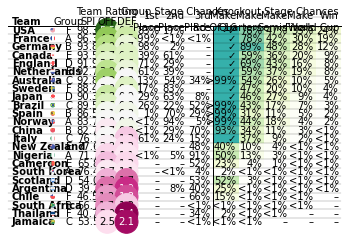

In [46]:
Table(df,column_definitions=col_defs).autoset_fontcolors(colnames=["OFF", "DEF"])

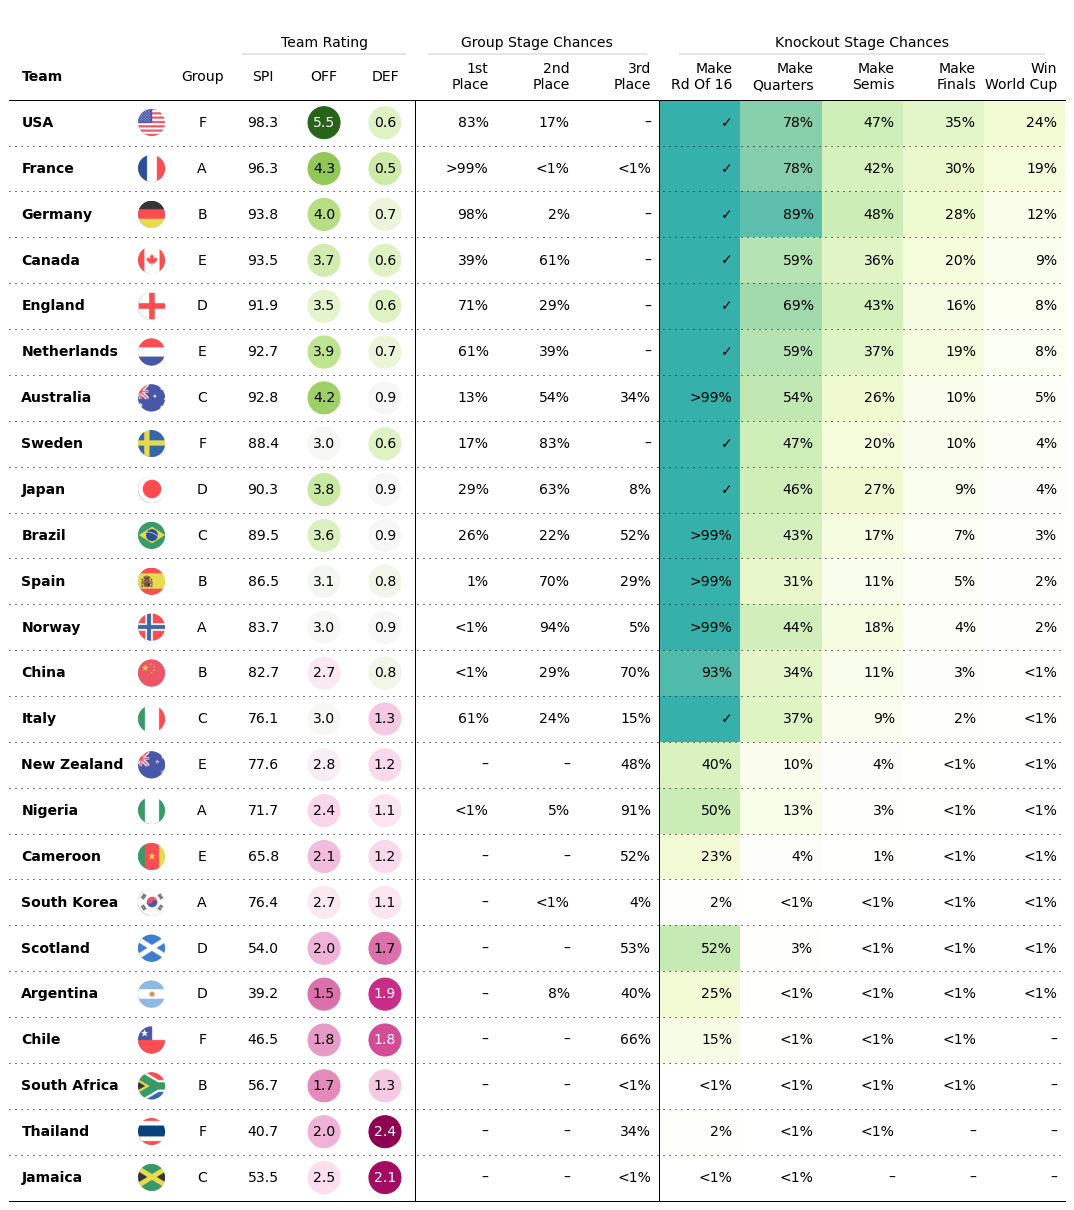

In [40]:
fig, ax = plt.subplots(figsize=(19, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
).autoset_fontcolors(colnames=["OFF", "DEF"])